# Tree Ensembles

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 42

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
categorical_features = [
  'Sex',
  'ChestPainType',
  'RestingECG',
  'ExerciseAngina',
  'ST_Slope'
]

In [4]:
df = pd.get_dummies(
  df,
  prefix=categorical_features, # Sex => Sex_F (bool), Sex_M (bool)
  columns=categorical_features
)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [5]:
X = df.drop('HeartDisease', axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [6]:
y = df['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=RANDOM_STATE
)

In [8]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] # if n_samples > min_sample_split then split and continue, else stop
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # if splitting takes us above this numer then stop, else continue

## Descision Tree Classifier

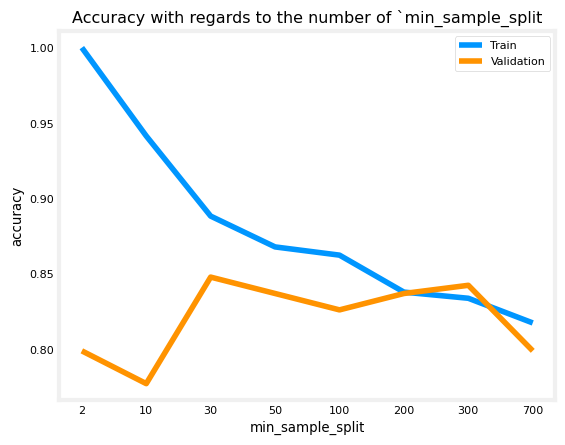

In [10]:
accuracy_scores_train = []
accuracy_scores_val = []

for min_sample_split in min_samples_split_list:
  model = DecisionTreeClassifier(
    min_samples_split=min_sample_split,
    random_state=RANDOM_STATE
  ). fit(
    X_train, y_train
  )

  yhat_train = model.predict(X_train)
  yhat_val = model.predict(X_val)

  accuracy_scores_train.append(accuracy_score(y_train, yhat_train))
  accuracy_scores_val.append(accuracy_score(y_val, yhat_val))

fig, ax = plt.subplots(1, 1);
ax.set_title('Accuracy with regards to the number of `min_sample_split');
ax.set_xlabel('min_sample_split');
ax.set_ylabel('accuracy');
ax.set_xticks(
  range(len(min_samples_split_list)),
  labels=min_samples_split_list
);
ax.plot(accuracy_scores_train)
ax.plot(accuracy_scores_val)
ax.legend(['Train', 'Validation'])

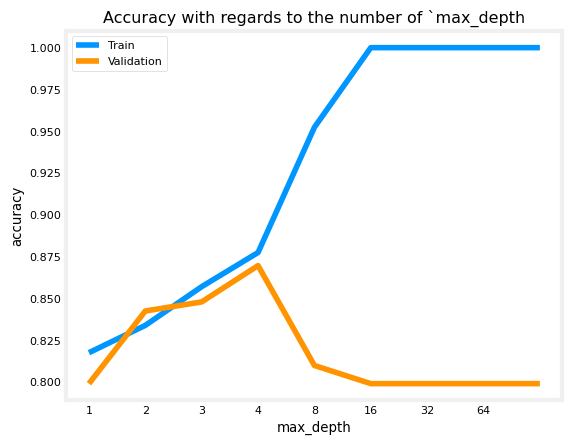

In [12]:
accuracy_scores_train = []
accuracy_scores_val = []

for max_depth in max_depth_list:
  model = DecisionTreeClassifier(
    max_depth=max_depth,
    random_state=RANDOM_STATE
  ). fit(
    X_train, y_train
  )

  yhat_train = model.predict(X_train)
  yhat_val = model.predict(X_val)

  accuracy_scores_train.append(accuracy_score(y_train, yhat_train))
  accuracy_scores_val.append(accuracy_score(y_val, yhat_val))

fig, ax = plt.subplots(1, 1);
ax.set_title('Accuracy with regards to the number of `max_depth');
ax.set_xlabel('max_depth');
ax.set_ylabel('accuracy');
ax.set_xticks(
  range(len(max_depth_list)),
  labels=max_depth_list
);
ax.plot(accuracy_scores_train)
ax.plot(accuracy_scores_val)
ax.legend(['Train', 'Validation'])

## Random Forest

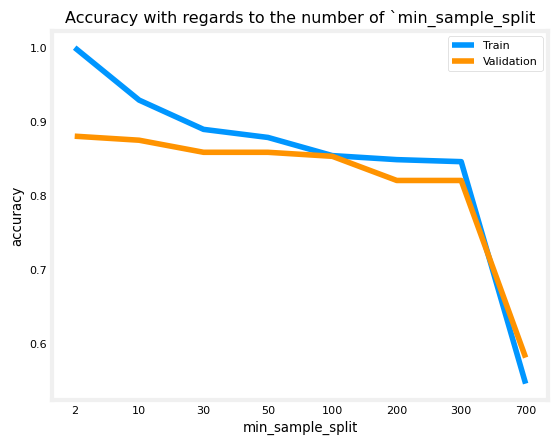

In [14]:
accuracy_scores_train = []
accuracy_scores_val = []

for min_sample_split in min_samples_split_list:
  model = RandomForestClassifier(
    min_samples_split=min_sample_split,
    random_state=RANDOM_STATE
  ). fit(
    X_train, y_train
  )

  yhat_train = model.predict(X_train)
  yhat_val = model.predict(X_val)

  accuracy_scores_train.append(accuracy_score(y_train, yhat_train))
  accuracy_scores_val.append(accuracy_score(y_val, yhat_val))

fig, ax = plt.subplots(1, 1);
ax.set_title('Accuracy with regards to the number of `min_sample_split');
ax.set_xlabel('min_sample_split');
ax.set_ylabel('accuracy');
ax.set_xticks(
  range(len(min_samples_split_list)),
  labels=min_samples_split_list
);
ax.plot(accuracy_scores_train)
ax.plot(accuracy_scores_val)
ax.legend(['Train', 'Validation'])

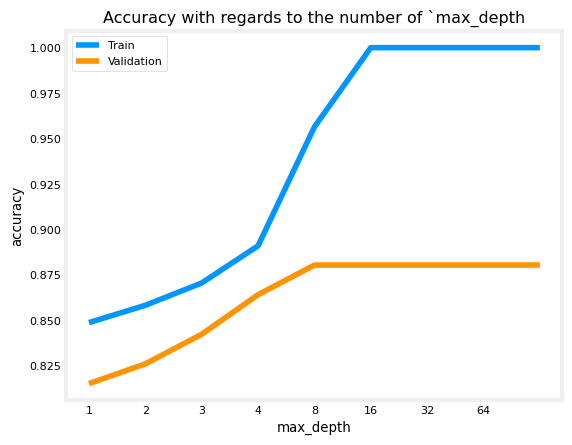

In [16]:
accuracy_scores_train = []
accuracy_scores_val = []

for max_depth in max_depth_list:
  model = RandomForestClassifier(
    max_depth=max_depth,
    random_state=RANDOM_STATE
  ). fit(
    X_train, y_train
  )

  yhat_train = model.predict(X_train)
  yhat_val = model.predict(X_val)

  accuracy_scores_train.append(accuracy_score(y_train, yhat_train))
  accuracy_scores_val.append(accuracy_score(y_val, yhat_val))

fig, ax = plt.subplots(1, 1);
ax.set_title('Accuracy with regards to the number of `max_depth');
ax.set_xlabel('max_depth');
ax.set_ylabel('accuracy');
ax.set_xticks(
  range(len(max_depth_list)),
  labels=max_depth_list
);
ax.plot(accuracy_scores_train)
ax.plot(accuracy_scores_val)
ax.legend(['Train', 'Validation']);

In [17]:
n_estimators_list = [10, 50, 100, 500]

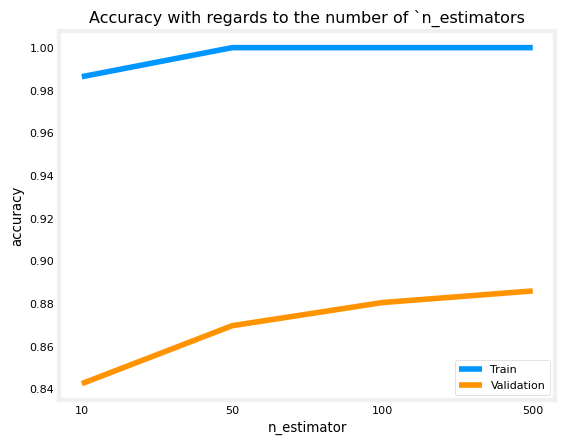

In [18]:
accuracy_scores_train = []
accuracy_scores_val = []

for n_estimators in n_estimators_list:
  model = RandomForestClassifier(
    n_estimators=n_estimators,
    random_state=RANDOM_STATE
  ). fit(
    X_train, y_train
  )

  yhat_train = model.predict(X_train)
  yhat_val = model.predict(X_val)

  accuracy_scores_train.append(accuracy_score(y_train, yhat_train))
  accuracy_scores_val.append(accuracy_score(y_val, yhat_val))

fig, ax = plt.subplots(1, 1);
ax.set_title('Accuracy with regards to the number of `n_estimators');
ax.set_xlabel('n_estimator');
ax.set_ylabel('accuracy');
ax.set_xticks(
  range(len(n_estimators_list)),
  labels=n_estimators_list
);
ax.plot(accuracy_scores_train)
ax.plot(accuracy_scores_val)
ax.legend(['Train', 'Validation']);

## XGBoost

In [20]:
# subset of training set
n = int(len(X) * 0.8)


X_train_fit, X_train_val, y_train_fit, y_train_val = X_train[:n], X_val[:n], y_train[:n], y_val[:n]

In [29]:
model = XGBClassifier(
  n_estimators=500,
  learning_rate=0.1,
  verbosity=1,
  random_state=RANDOM_STATE,
  device='cuda',
  early_stopping_rounds=10
).fit(
  X_train_fit,
  y_train_fit,
  eval_set=[(X_train_val, y_train_val)]
)

model

[0]	validation_0-logloss:0.62875
[1]	validation_0-logloss:0.58628
[2]	validation_0-logloss:0.54763
[3]	validation_0-logloss:0.51364
[4]	validation_0-logloss:0.48860
[5]	validation_0-logloss:0.46466
[6]	validation_0-logloss:0.44211
[7]	validation_0-logloss:0.42580
[8]	validation_0-logloss:0.41149
[9]	validation_0-logloss:0.39783
[10]	validation_0-logloss:0.38844
[11]	validation_0-logloss:0.37775
[12]	validation_0-logloss:0.37031
[13]	validation_0-logloss:0.36226
[14]	validation_0-logloss:0.35580
[15]	validation_0-logloss:0.34839
[16]	validation_0-logloss:0.34525
[17]	validation_0-logloss:0.34050
[18]	validation_0-logloss:0.33824
[19]	validation_0-logloss:0.33426
[20]	validation_0-logloss:0.32885
[21]	validation_0-logloss:0.32978
[22]	validation_0-logloss:0.32963
[23]	validation_0-logloss:0.32896
[24]	validation_0-logloss:0.32658
[25]	validation_0-logloss:0.32550
[26]	validation_0-logloss:0.32613
[27]	validation_0-logloss:0.32548
[28]	validation_0-logloss:0.32351
[29]	validation_0-loglos

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cuda'
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


In [ ]:
model.best_iteration # see iterations above

# output = 31; in fact, since `early_stopping_rounds = 10`, there are 41 iterations

31